In [1]:
from lightgbm import LGBMClassifier,LGBMRegressor
from lightgbm import plot_importance,plot_metric,plot_tree

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,cross_validate

In [8]:
iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size = 0.2,random_state = 123)

In [9]:
lgbmc = LGBMClassifier(n_estimators = 400)
evals = [(X_test,y_test)]
lgbmc.fit(X_train,y_train,early_stopping_rounds = 100,eval_metric = 'logloss',eval_set = evals, verbose = True)
preds = lgbmc.predict(X_test)

[1]	valid_0's multi_logloss: 0.95847
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 0.832184
[3]	valid_0's multi_logloss: 0.731164
[4]	valid_0's multi_logloss: 0.641056
[5]	valid_0's multi_logloss: 0.571726
[6]	valid_0's multi_logloss: 0.507286
[7]	valid_0's multi_logloss: 0.454933
[8]	valid_0's multi_logloss: 0.410205
[9]	valid_0's multi_logloss: 0.372194
[10]	valid_0's multi_logloss: 0.333919
[11]	valid_0's multi_logloss: 0.310212
[12]	valid_0's multi_logloss: 0.282326
[13]	valid_0's multi_logloss: 0.257165
[14]	valid_0's multi_logloss: 0.240836
[15]	valid_0's multi_logloss: 0.225383
[16]	valid_0's multi_logloss: 0.211583
[17]	valid_0's multi_logloss: 0.199289
[18]	valid_0's multi_logloss: 0.186269
[19]	valid_0's multi_logloss: 0.171556
[20]	valid_0's multi_logloss: 0.168245
[21]	valid_0's multi_logloss: 0.161065
[22]	valid_0's multi_logloss: 0.151371
[23]	valid_0's multi_logloss: 0.148081
[24]	valid_0's multi_logloss: 0.143843
[25]	valid_0

In [14]:
cross_val = cross_validate(
    estimator = lgbmc,
    X = iris.data,y =iris.target,
    cv = 5,
)

print('avg fit time :{}(+/-{})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time :{}(+/-{})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time :{}(+/-{})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time :0.06394495964050292(+/-0.0028442906714595526)
avg score time :0.00020093917846679686(+/-0.00040187835693359373)
avg test time :0.9600000000000002(+/-0.04898979485566355)


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

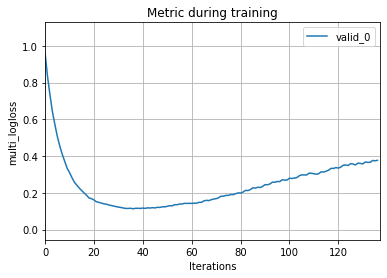

In [15]:
plot_metric(lgbmc)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

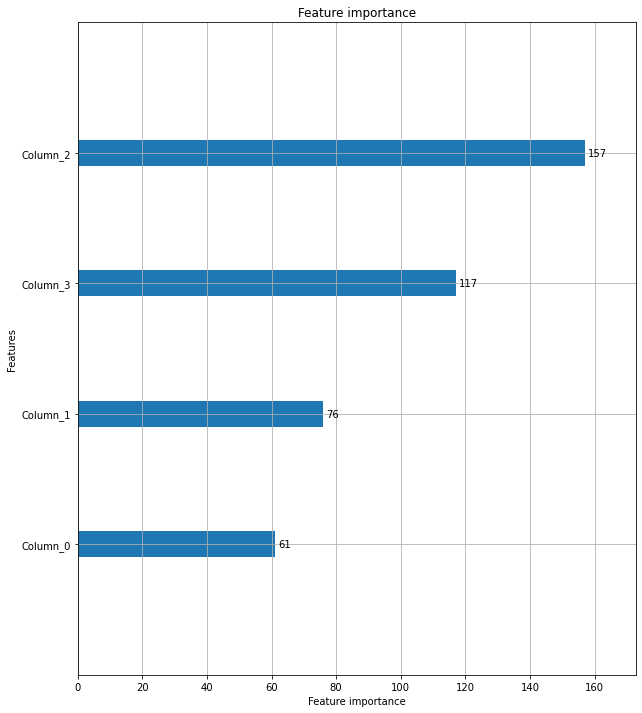

In [17]:
plot_importance(lgbmc,figsize = (10,12))

<AxesSubplot:>

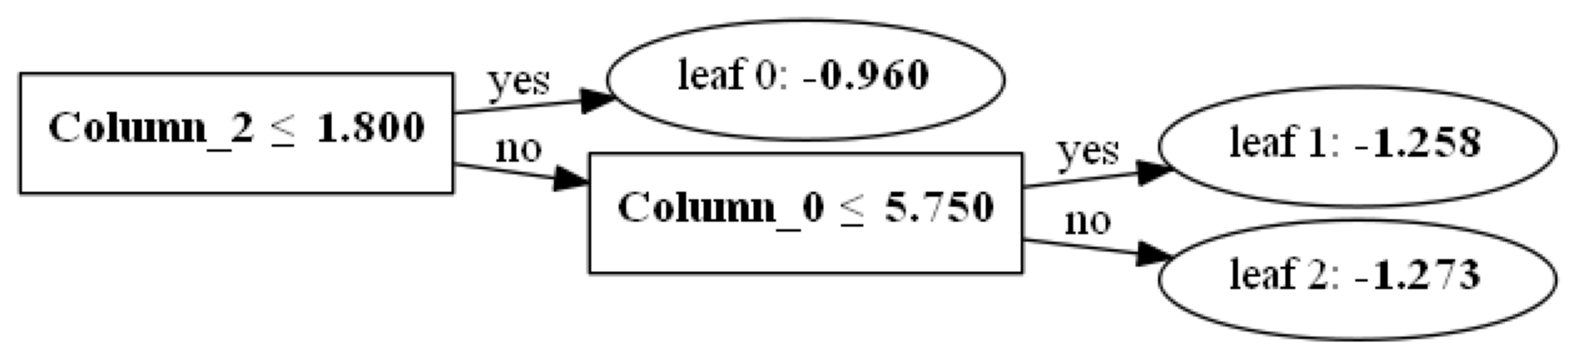

In [20]:
plot_tree(lgbmc,figsize = (28,24))

In [44]:
from sklearn.datasets import load_boston
boston = load_boston()
X_train,X_test,y_train,y_test = train_test_split(boston.data,boston.target,test_size = 0.2,random_state = 123)

In [48]:
lgbmr = LGBMRegressor(n_estimators = 400)
evals = [(X_test,y_test)]
lgbmr.fit(X_train,y_train,early_stopping_rounds = 100,eval_metric = 'logloss',eval_set = evals, verbose = True)
preds = lgbmr.predict(X_test)

[1]	valid_0's l2: 71.4897
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l2: 61.8603
[3]	valid_0's l2: 54.0848
[4]	valid_0's l2: 47.9263
[5]	valid_0's l2: 43.0702
[6]	valid_0's l2: 39.268
[7]	valid_0's l2: 36.2667
[8]	valid_0's l2: 33.8931
[9]	valid_0's l2: 31.7028
[10]	valid_0's l2: 30.082
[11]	valid_0's l2: 29.1638
[12]	valid_0's l2: 27.9059
[13]	valid_0's l2: 27.2503
[14]	valid_0's l2: 26.3942
[15]	valid_0's l2: 26.0862
[16]	valid_0's l2: 25.6483
[17]	valid_0's l2: 25.0221
[18]	valid_0's l2: 24.919
[19]	valid_0's l2: 24.5501
[20]	valid_0's l2: 24.2858
[21]	valid_0's l2: 23.9636
[22]	valid_0's l2: 23.8872
[23]	valid_0's l2: 23.676
[24]	valid_0's l2: 23.5907
[25]	valid_0's l2: 23.4353
[26]	valid_0's l2: 23.1653
[27]	valid_0's l2: 23.0198
[28]	valid_0's l2: 22.8605
[29]	valid_0's l2: 22.8311
[30]	valid_0's l2: 22.8943
[31]	valid_0's l2: 22.8056
[32]	valid_0's l2: 22.9915
[33]	valid_0's l2: 22.9286
[34]	valid_0's l2: 23.0395
[35]	valid_0's l2: 22.76
[36]	val

In [49]:
cross_val = cross_validate(
    estimator = lgbmr,
    X = boston.data,y =boston.target,
    cv = 5,
)

print('avg fit time :{}(+/-{})'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time :{}(+/-{})'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time :{}(+/-{})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time :0.09266581535339355(+/-0.008377987071775974)
avg score time :0.00020074844360351562(+/-0.00040149688720703125)
avg test time :0.5692468252571979(+/-0.2956636613238221)


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='l2'>

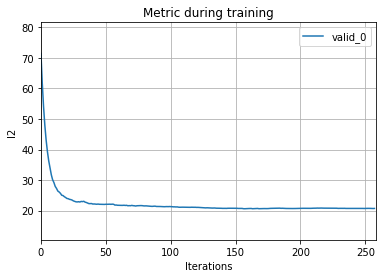

In [50]:
plot_metric(lgbmr)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

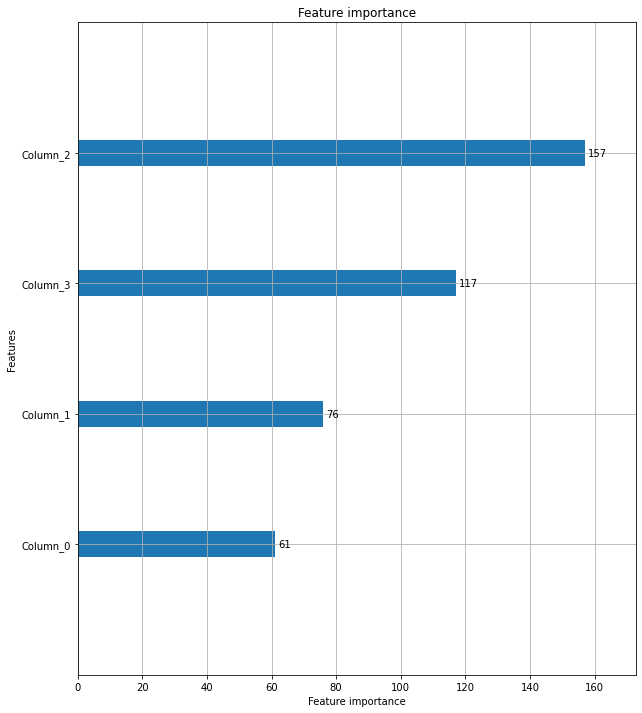

In [51]:
plot_importance(lgbmc,figsize = (10,12))

<AxesSubplot:>

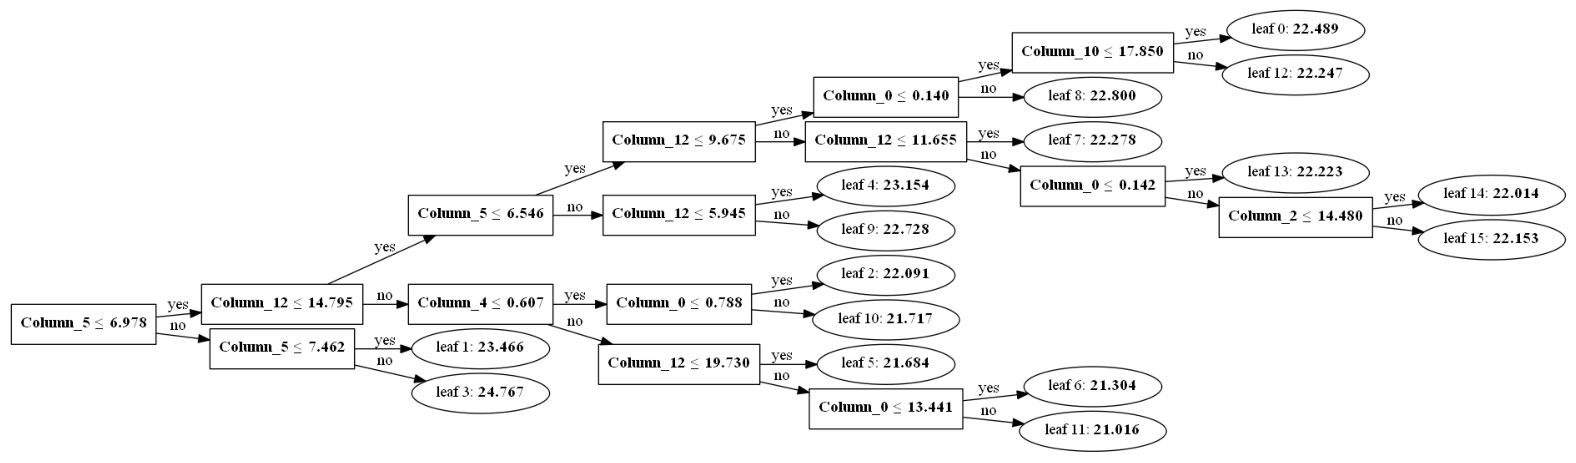

In [52]:
plot_tree(lgbmr,figsize = (28,24))